In [1]:
import numpy as np
import nengo
from nengo.utils.ensemble import tuning_curves
import matplotlib
import matplotlib.pyplot as plt

In [97]:
def simulate_additive_functions(
        stim_A, stim_B, f_A, f_B, n_A=101, n_B=102, n_C=103, T=1.0, dt=1e-4):
    with nengo.Network(seed=581) as model:
        nd_stim_A = nengo.Node(stim_A)
        nd_stim_B = nengo.Node(stim_B)

        ens_A = nengo.Ensemble(
            n_neurons=n_A, dimensions=1,
            max_rates=nengo.dists.Uniform(50, 100))
        ens_B = nengo.Ensemble(
            n_neurons=n_B, dimensions=1,
            max_rates=nengo.dists.Uniform(50, 100))
        ens_C = nengo.Ensemble(
            n_neurons=n_C, dimensions=1,
            max_rates=nengo.dists.Uniform(50, 100))

        nengo.Connection(nd_stim_A, ens_A, synapse=None)
        nengo.Connection(nd_stim_B, ens_B, synapse=None)
        p_stim_A = nengo.Probe(nd_stim_A, synapse=None)
        p_stim_B = nengo.Probe(nd_stim_B, synapse=None)

        nengo.Connection(ens_A, ens_C, function=f_A)
        nengo.Connection(ens_B, ens_C, function=f_B)
        p_ens_A = nengo.Probe(ens_A, synapse=10e-3)
        p_ens_B = nengo.Probe(ens_B, synapse=10e-3)
        p_ens_C = nengo.Probe(ens_C, synapse=10e-3)

    with nengo.Simulator(model, dt=dt, progress_bar=None) as sim:
        sim.run(T)

    return \
        sim.trange(), \
        sim.data[p_stim_A], \
        sim.data[p_stim_B], \
        sim.data[p_ens_A], \
        sim.data[p_ens_B], \
        sim.data[p_ens_C], \
        f_A, f_B,

def plot_additive_functions(ts, stim_A, stim_B, ens_A, ens_B, ens_C, f_A, f_B):
    fig, (ax1, ax2, ax3) = plt.subplots(
        3, 1, figsize=(4.75, 3.5), sharex=True)

    cm = matplotlib.cm.get_cmap('tab10')
    
    ax1.plot(ts, ens_A, color=cm(0.0))
    ax1.plot(ts, stim_A, 'k--')
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_ylabel('$x$')

    ax2.plot(ts, ens_B, color=cm(0.1))
    ax2.plot(ts, stim_B, 'k--')
    ax2.set_ylim(-1.5, 1.5)
    ax2.set_ylabel('$y$')

    ax3.plot(ts, ens_C, color=cm(0.2))
    ax3.plot(ts, f_A(stim_A) + f_B(stim_B), 'k--')
    ax3.set_ylim(-1.5, 1.5)
#    ax3.set_ylabel('$\\frac{1}{2} x + y^2$')
    ax3.set_ylabel('$x + y$')
    ax3.set_xlabel('Time $t$ (s)')

    fig.tight_layout()
    return fig

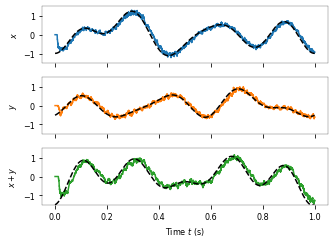

In [98]:
T, dt = 1.0, 1e-4
#fig = plot_additive_functions(*simulate_additive_functions(
#    nengo.processes.WhiteSignal(period=T, high=5.0, rms=0.5),
#    nengo.processes.WhiteSignal(period=T, high=5.0, rms=0.5),
#    lambda x: 0.5 * x,
#    lambda y: y ** 2,
#));
fig = plot_additive_functions(*simulate_additive_functions(
    nengo.processes.WhiteSignal(period=T, high=5.0, rms=0.5),
    nengo.processes.WhiteSignal(period=T, high=5.0, rms=0.5),
    lambda x: x,
    lambda y: y,
));
fig.savefig("../multivariate_addition.pdf", transparent=True, bbox_inches='tight')

In [93]:
def simulate_nonlinear_function(
        stim_A, stim_B, f, n_A=101, n_B=102, n_C=103, T=1.0, dt=1e-4):
    with nengo.Network(seed=581) as model:
        nd_stim_A = nengo.Node(stim_A)
        nd_stim_B = nengo.Node(stim_B)

        ens_A = nengo.Ensemble(
            n_neurons=n_A, dimensions=2,
            max_rates=nengo.dists.Uniform(50, 100))
        ens_B = nengo.Ensemble(
            n_neurons=n_C, dimensions=1,
            max_rates=nengo.dists.Uniform(50, 100))

        nengo.Connection(nd_stim_A, ens_A[0], synapse=None)
        nengo.Connection(nd_stim_B, ens_A[1], synapse=None)
        p_stim_A = nengo.Probe(nd_stim_A, synapse=None)
        p_stim_B = nengo.Probe(nd_stim_B, synapse=None)

        nengo.Connection(ens_A, ens_B, function=f)
        p_ens_A = nengo.Probe(ens_A, synapse=10e-3)
        p_ens_B = nengo.Probe(ens_B, synapse=10e-3)

    with nengo.Simulator(model, dt=dt, progress_bar=None) as sim:
        sim.run(T)

    return \
        sim.trange(), \
        sim.data[p_stim_A], \
        sim.data[p_stim_B], \
        sim.data[p_ens_A], \
        sim.data[p_ens_B], \
        f

def plot_nonlinear_function(ts, stim_A, stim_B, ens_A, ens_B, f):
    fig = plt.figure(figsize=(4.75, 3.5))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((3, 1), (1, 0), rowspan=2, colspan=1)

    cm = matplotlib.cm.get_cmap('tab10')
    
    ax1.plot(ts, ens_A[:, 0], color=cm(0.0), label="$x$")
    ax1.plot(ts, ens_A[:, 1], color=cm(0.1), label="$y$")
    ax1.plot(ts, stim_A, 'k--')
    ax1.plot(ts, stim_B, 'k--')
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_ylabel('$\\vec z = (x, y)$')
    ax1.legend(ncol=2)

    ax2.plot(ts, ens_B, color=cm(0.2))
    ax2.plot(ts, f(np.concatenate((stim_A, stim_B), axis=1).T), 'k--')
    ax2.set_ylim(-1, 1)
    ax2.set_ylabel('$f(x, y) = x \\cdot y$')
    ax2.set_xlabel('Time $t$ (s)')

    fig.tight_layout()
    return fig

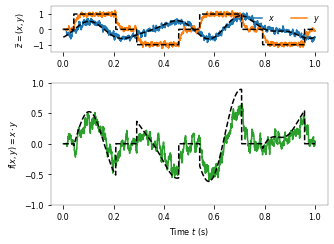

In [94]:
T, dt = 1.0, 1e-4
fig = plot_nonlinear_function(*simulate_nonlinear_function(
    nengo.processes.WhiteSignal(period=T, high=5.0, rms=0.5),
    lambda t: np.round(np.sin(4.0 * np.pi * t)),
    lambda x: x[0] * x[1]
));
fig.savefig("../multivariate_multiplication.pdf", transparent=True, bbox_inches='tight')